# Multi-dimer NF-κB model

The below code will create the multi-dimer NF-κB model as parameterised in the upcoming Science Signalling Paper and run it canonical activation, non-canonical activation and differing basal (steady state) activation of NEMO IKK. It will run all models with the conditions specified which by default are: WT, high cRel and high RelA, to explore how these things interact within the NFκB network.

Make sure you have a julia kernel selected that has many threads. Here is how many threads you have available:

In [5]:
import Base.Threads
Threads.nthreads()

4

In [6]:
# #this is an old version please don't copy, find the plotAllSpecies.jl from somewhere recent
# function plotAllSpecies(speciesToPlot,conditionsToPlot,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis)
#     for species in speciesToPlot
#         #thisPlot=plot(title=species)
#         thisPlotStd=plot(title=species*" avg",legend=:none)
#         boxPlotAll=plot(title=species*" ss",legend=:none)
#         BoxPlotAvg=plot(title=species*"avg ss")
#         conditionIndex=1
#         meansOfAllConditions=zeros(1,length(conditionsToPlot))
#         stdOfAllConditions=zeros(1,length(conditionsToPlot))
#         lengthOfTC=0
#         for condition in conditionsToPlot
#             lengthOfTC=size(DataFrame(CSV.File(folder*"/sol_"*condition*"_cell_1.csv")),2)-1

#             conditionArray=zeros(last_cell,lengthOfTC)
#             lineColor=colorArray[conditionIndex]
#             virtExpFlag=false
#             for i in first_cell:last_cell
#                 thisCellData=DataFrame(CSV.File(folder*"/sol_"*condition*"_cell_"*string(i)*".csv"))
#                 if !("names" in names(thisCellData))
#                     insertcols!(thisCellData, 1, :names=>syms)
#                 end
#                 allNoneFloats=findall(eltype.(eachcol(thisCellData)).!=Float64)
#                 if length(allNoneFloats)>1
#                     for index in allNoneFloats[2:end]
#                         thisCellData[!,index]=parse.(Float64,thisCellData[:,index])
#                     end
#                 end
#                 thisTC=zeros(1,size(thisCellData,2)-1)
#                 if endswith(species,"*")
#                     virtExpFlag=true
#                     speciesShort=species[1:end-1]
#                     speciesIDs=intersect(findall( x ->occursin(speciesShort,x),syms),findall(x->!startswith(x,"t"),syms))
#                     speciesNames=String.(syms[speciesIDs])
# #                     println("For species: "*species*" printing: ")
# #                     println(speciesNames)
#                     for thisName in speciesNames
#                         thisSpeciesTC=Matrix(thisCellData[thisCellData[!,:names].==thisName,:])[2:end]
                        
#                         thisTC=thisTC.+thisSpeciesTC'
#                     end
#                 else
#                     thisTC=Matrix(thisCellData[thisCellData[!,:names].==species,:])[2:end]
#                 end
#                 conditionArray[i,:]=thisTC[1:lengthOfTC]


#             end

#             df = DataFrame(Float64.(conditionArray),:auto)
#             #add the variable names and save to a file
#             #CSV.write("outputs/sol_"*thisCondition*"_cell_"*string(i)*".csv",Tables.columntable(df));
#             CSV.write("outputs/allTCs_"*species*"_cell.csv",df);

            
#             meanOfCondition=mean(conditionArray, dims=1)
#             stdOfCondition=std(conditionArray, dims=1)
# #             println(meanOfCondition)
# #             println(stdOfCondition)
#             plot!(thisPlotStd,meanOfCondition',grid=false,color=lineColor,ribbon=stdOfCondition',fillalpha=.5,label=condition,linewidth=5)

#             meansOfAllConditions[conditionIndex]=meanOfCondition[1]
#             stdOfAllConditions[conditionIndex]=stdOfCondition[1]

#             conditionIndex+=1
#         end
#         conditionIndex=1
#         #plot!(boxPlotAll,conditionsToPlot, meansOfAllConditions;, c=colorArray, yerr = stdOfAllConditions', label = "",xrotation = 90,seriestype = :scatter,fillcolor=:match)
#         for condition in conditionsToPlot
#             plot!(boxPlotAll,[conditionIndex], [meansOfAllConditions[conditionIndex]], c=colorArray[conditionIndex], yerr = stdOfAllConditions[conditionIndex], label = false,xrotation = 90,seriestype = :scatter,fillcolor=:match,markersize=20,markerstrokewidth=5)            
#             conditionIndex+=1
#         end
#         plot!(boxPlotAll,xticks = (1:length(conditions), conditions),xlim=(0,length(conditionsToPlot)+1),ylim=(0,maximum([maximum(meansOfAllConditions)+maximum(stdOfAllConditions),maxValOfYAxis])),dpi=300,size=(0.8*[800,1000]),xtickfontsize=18,ytickfontsize=18)        
#         plot!(thisPlotStd,xticks=(collect(0:60:lengthOfTC),collect(0:1:lengthOfTC/60)),ylim=(0,maxValOfYAxis),xlim=(0,hoursToPlot*60),dpi=300,size=([1500*0.6,1000*0.8]),xtickfontsize=18,ytickfontsize=18)

#         #display(plot(boxPlotAll,thisPlot))
#         display(plot(boxPlotAll,thisPlotStd,layout = grid(1, 2, widths=[0.4 ,0.6])))
#     end
# end


In [7]:
#packages we need
using Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Plots")
Pkg.add("CSV")
Pkg.add("Distributions")
Pkg.add("Random")
Pkg.add("DataFrames")
Pkg.add("JLD2")
Pkg.add("FileIO")
Pkg.add("StatsPlots")
Pkg.add("Statistics")
Pkg.add(Pkg.PackageSpec(;name="Parsers", version="2.2.4"))
using DifferentialEquations
using Plots 
using Pkg
Pkg.add(Pkg.PackageSpec(;name="Parsers", version="2.2.4"))
using CSV
using Distributions
using Random
using DataFrames
using JLD2
using FileIO
using StatsPlots
using Plots.PlotMeasures
using Statistics
using Dates
colorArray=palette(:seaborn_colorblind)
delay=false

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environ

false

In [8]:
#fix the death ligand concentration
t=0
include("distributedModelFiles/odeModel.jl")
include("variableNames.jl")
include("scanIncludes.jl")
include("runSimulationNFkB.jl")
# include("runSimulationSaveSS.jl")
include("plotAllSpecies2.jl")
# include("plotAllSpeciesSS.jl");
include("denseIKKNIKheatmap.jl");
include("denseheatmapSS.jl");

parameters can now be searched in parameterNameList by name.
example to modify k_binding 1.5 fold higher:
indexOfParam=findfirst(x->"k_binding"==x,parameterNameList)
paramVals[indexOfParam]=paramVals[indexOfParam]*1.5


In [9]:
first_cell=1
last_cell=1

#set up where CSV2Julia is
#from: https://github.com/SiFTW/CSV2JuliaDiffEq
locationOfCSV2Julia="csv2model-multiscale.py"

#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/NFkB/updated_NFkB_reactions.csv"
parametersFile="moduleDefinitionFiles/NFkB/parameters.csv"
rateLawsFile="moduleDefinitionFiles/NFkB/rateLaws.csv"
generatedCSVLocation="generatedCSVs/"
distributedModelFilesLocation="distributedModelFiles/"


mkpath(generatedCSVLocation)
mkpath(distributedModelFilesLocation)

totalIKK=140
total_WT_IKK=totalIKK*1.0
basalIKK=totalIKK/100
IKKMultiplier=1
maxTimeSS=100000.0
maxTimeTC=60*8
preCV=0.11;
#preCV=0.0

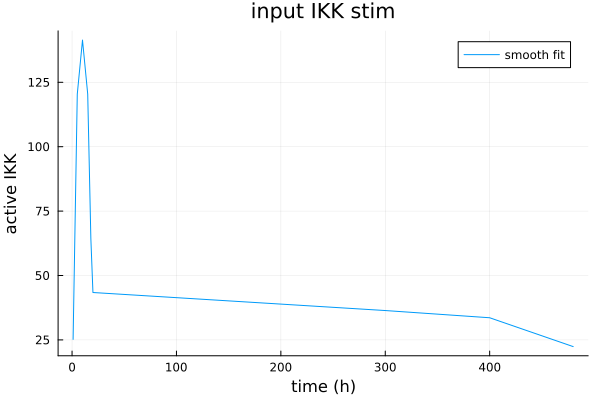

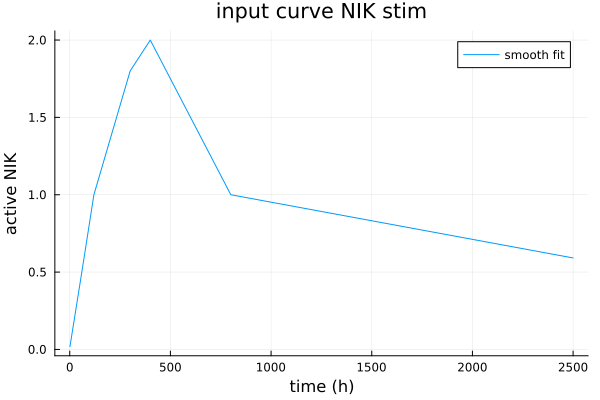

In [11]:
function ikkDefault(t,maxTime)
    #explicitely defined input
    IKKparamVals=[0,85,100,85,45,30,25,23,18,15,12,10,10]./100
    paramTime=[0,5,10,15,18,20,300,400,450,480,500,520,max(maxTime,2880)]
    #get the value after the current time point
    indexGTTime=min(searchsortedfirst(paramTime,t),length(paramTime))
    #get the one before
    indexLTTime=max(1,indexGTTime-1)
    timeGTt=paramTime[indexGTTime]
    timeLTt=paramTime[indexLTTime]
    valGTt=IKKparamVals[indexGTTime]
    valLTt=IKKparamVals[indexLTTime]
    timeDiff=timeGTt-timeLTt
    #if the time before and time after are different do a basic linear interpolation between the two.
    if timeDiff>0
        valDiff=valGTt-valLTt
        gradient=valDiff/timeDiff
        timeStep=t-timeLTt
        return valLTt+(gradient*timeStep)
    else
        return valLTt
    end
end

function NIKDefault(t,maxTime)
    #explicitely defined input
    NIKparamVals=[1,50,100,180,200,100,50]./100
    paramTime=[0,60,120,300,400,800,max(maxTime,2880)]
    #get the value after the current time point
    indexGTTime=min(searchsortedfirst(paramTime,t),length(paramTime))
    #get the one before
    indexLTTime=max(1,indexGTTime-1)
    timeGTt=paramTime[indexGTTime]
    timeLTt=paramTime[indexLTTime]
    valGTt=NIKparamVals[indexGTTime]
    valLTt=NIKparamVals[indexLTTime]
    timeDiff=timeGTt-timeLTt
    #if the time before and time after are different do a basic linear interpolation between the two.
    if timeDiff>0
        valDiff=valGTt-valLTt
        gradient=valDiff/timeDiff
        timeStep=t-timeLTt
        return valLTt+(gradient*timeStep)
    else
        return valLTt
    end
end

#the IKK function is just maps to basal IKK during SS and basal+the IKK curve during the time course.
ikkSS=t->basalIKK
ikkTC=t->basalIKK+(ikkDefault(t, maxTimeTC)*IKKMultiplier*totalIKK);
ikkTCWT=t->basalIKK+(ikkDefault(t, maxTimeTC)*IKKMultiplier*total_WT_IKK);
ikkCurveForLine=[ikkTCWT]
ikkFunc=ikkTCWT
NIKFuncSS=t->1
NIKFuncTC=t->0
ikkSSHigh=t->basalIKKHigh

p=plot([1:1:maxTimeTC],ikkTC.(1:1:maxTimeTC),label="smooth fit",title="input IKK stim");
xlabel!("time (h)")
ylabel!("active IKK")
display(p)

NIKDefaultTC=t->NIKDefault(t,2500)
p=plot([1:1:2500],NIKDefaultTC.(1:1:2500),label="smooth fit",title="input curve NIK stim");
xlabel!("time (h)")
ylabel!("active NIK")

The below code first creates the ODE file.

In [ ]:
parametersDF = DataFrame(CSV.File(parametersFile,types=Dict(:parameter=>String, :value=>String, :distribute=>Int64)))
originalParams=deepcopy(parametersDF)

thisModelName="odeModel.jl"
thisParamFile=parametersFile
arguments=[reactionsFile, thisParamFile, rateLawsFile,thisModelName]
cmd=`python3 $locationOfCSV2Julia $arguments param`

#lets run csv2julia (requires python to be installed)
run(cmd)

include(thisModelName)
mv(thisModelName,"distributedModelFiles/"*thisModelName, force=true)
println("Model generated for all conditions")

The below function will run the number of cells you specify, with the conditions you specify and the input curves specified. It will use multiple threads to do so and save the results in a different folder for each condition.

In [ ]:
include("runSimulationNFkB.jl")
include("plotAllSpecies2.jl")

The below code is used to plot some graphs. It will plot the species you specify and compare between each condition. It will plot both steady state values (as bar graphs on the left), and time courses (as line graphs on the right). IT will calculate the standard deviation and mean of each cell populationin each condition and show thenm as error regions.

First we'll run the WT condition with with IKK inputs, followed by repeating the simulations with 10X RelA synthesis and 10x cRel synthesis. We specify and output folder so that the next simulations we run can go to a different folder.

In [ ]:
#conditions=["WT","moreRelA","morecRel","moreRelB","morep100","moreRelBAndp100","morep50"]
conditions=["WT","moreRelA","morecRel"]
#paramsToChange=[["k1_RelASynth"],["k1_RelASynth","k1_cRelSynth"],["k1_RelASynth","k1_cRelSynth"],["basal_RelBSynth"],["basal_p100Synth"],["basal_RelBSynth","basal_p100Synth"],["basal_p50Synth"]]
paramsToChange=[["k1_RelASynth"],["k1_RelASynth","basal_cRelSynth"],["k1_RelASynth","basal_cRelSynth"]]
# modifyAmount=[
#         [1.0],[10,1.0],[1.0,10],[10],[10],[10,10],[10]
#     ]
modifyAmount=[
         [1.0],[10,1.0],[1.0,10]
     ]
IKKSSArray=[ikkSS,ikkSS,ikkSS]
IKKTCArray=[ikkTC,ikkTC,ikkTC]
NIKSSArray=[NIKFuncSS,NIKFuncSS,NIKFuncSS]
NIKTCArray=[NIKFuncSS,NIKFuncSS,NIKFuncSS]
println("Summary of conditions being run:")
.folder="outputs"
show(IOContext(stdout, :limit => false), "text/plain", hcat(conditions,paramsToChange,modifyAmount))
runSimulationNew(first_cell,last_cell,conditions,folder,IKKSSArray,IKKTCArray,NIKSSArray,NIKTCArray)

To plot the outputs just specify which folder you want to plot and then which conditions and species you want to plot.

In [ ]:
###### folder="outputs"
hoursToPlot=4
colorArray=palette(:seaborn_colorblind)
folder="outputs"
#conditions=["WT","moreRelA","morecRel","moreRelB","morep100","moreRelBAndp100","morep50"]
conditions=["WT","moreRelA","morecRel"]
speciesToPlot=["cRelnp50n","RelAnp50n","RelBnp52n","RelBnp50n","IkBb*","IkBe*"]
maxValOfYAxis=250
plotAllSpecies(speciesToPlot,conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis)

In [ ]:
###### folder="outputs"
hoursToPlot=4
colorArray=palette(:seaborn_colorblind)
folder="outputs"
#conditions=["WT","moreRelA","morecRel","moreRelB","morep100","moreRelBAndp100","morep50"]
conditions=["WT","moreRelA","morecRel"]
speciesToPlot=["IkBa*" "IkBd*" "IkBe*"]
maxValOfYAxis=2400
plotAllSpecies(speciesToPlot,conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis)

In [ ]:
maxTimeTC=40*60

#conditions=["WT","moreRelA","morecRel","moreRelB","morep100","moreRelBAndp100","morep50"]
conditions=["WT","moreRelA","morecRel"]
#paramsToChange=[["k1_RelASynth"],["k1_RelASynth","k1_cRelSynth"],["k1_RelASynth","k1_cRelSynth"],["basal_RelBSynth"],["basal_p100Synth"],["basal_RelBSynth","basal_p100Synth"],["basal_p50Synth"]]
paramsToChange=[["k1_RelASynth"],["k1_RelASynth","basal_cRelSynth"],["k1_RelASynth","basal_cRelSynth"]]
# modifyAmount=[
#         [1.0],[10,1.0],[1.0,10],[10],[10],[10,10],[10]
#     ]
modifyAmount=[
         [1.0],[10,1.0],[1.0,10]
     ]
IKKSSArray=[ikkSS,ikkSS,ikkSS]
IKKTCArray=[ikkSS,ikkSS,ikkSS]
NIKSSArray=[NIKFuncSS,NIKFuncSS,NIKFuncSS]
NIKTCArray=[NIKFuncTC,NIKFuncTC,NIKFuncTC]
println("Summary of conditions being run:")
show(IOContext(stdout, :limit => false), "text/plain", hcat(conditions,paramsToChange,modifyAmount))
folder="outputs/NIK"
runSimulationNew(first_cell,last_cell,conditions,folder,IKKSSArray,IKKTCArray,NIKSSArray,NIKTCArray)

In [ ]:
plotly()
folder="outputs/NIK"
colorArray=palette(:seaborn_colorblind)
hoursToPlot=40
conditions=["WT","moreRelA","morecRel"]
speciesToPlot=["RelAnp50n","cRelnp50n","RelBnp52n","RelBnp50n","NIK"]
maxValOfYAxis=250
plotAllSpecies2(speciesToPlot,conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis,0.7)

In [ ]:
# IKKScalarArray=[1,2,5,10,50,100]
conditions=["ikk1","ikk2","ikk5","ikk10","ikk50","ikk100"]
maxTimeTC=40*60
ikkSS1=t->basalIKK.*1
ikkSS2=t->basalIKK.*2
ikkSS5=t->basalIKK.*5
ikkSS10=t->basalIKK.*10
ikkSS13=t->basalIKK.*13
ikkSS15=t->basalIKK.*15
ikkSS25=t->basalIKK.*25
ikkSS50=t->basalIKK.*50
ikkSS100=t->basalIKK.*100
ikkSS1000=t->basalIKK.*1000


#conditions=["WT","moreRelA","morecRel","moreRelB","morep100","moreRelBAndp100","morep50"]
conditions=["ikkSS1","ikkSS2","ikkSS5","ikkSS10","ikkSS13","ikkSS15","ikkSS25","ikkSS100","ikkSS1000"]
#paramsToChange=[["k1_RelASynth"],["k1_RelASynth","k1_cRelSynth"],["k1_RelASynth","k1_cRelSynth"],["basal_RelBSynth"],["basal_p100Synth"],["basal_RelBSynth","basal_p100Synth"],["basal_p50Synth"]]
paramsToChange=[["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"]]
# modifyAmount=[
#         [1.0],[10,1.0],[1.0,10],[10],[10],[10,10],[10]
#     ]
modifyAmount=[
         [1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0]
     ]
IKKSSArray=[ikkSS1,ikkSS2,ikkSS5,ikkSS10,ikkSS13,ikkSS15,ikkSS25,ikkSS100,ikkSS1000]
IKKTCArray=[ikkSS1,ikkSS2,ikkSS5,ikkSS10,ikkSS13,ikkSS15,ikkSS25,ikkSS100,ikkSS1000]
NIKSSArray=[NIKFuncSS,NIKFuncSS,NIKFuncSS,NIKFuncSS,NIKFuncSS,NIKFuncSS,NIKFuncSS,NIKFuncSS,NIKFuncSS]
NIKTCArray=[NIKFuncTC,NIKFuncTC,NIKFuncTC,NIKFuncTC,NIKFuncTC,NIKFuncTC,NIKFuncTC,NIKFuncTC,NIKFuncTC]
println("Summary of conditions being run:")
show(IOContext(stdout, :limit => false), "text/plain", hcat(conditions,paramsToChange,modifyAmount))
folder="outputs/IKK"
runSimulationNew(first_cell,last_cell,conditions,folder,IKKSSArray,IKKTCArray,NIKSSArray,NIKTCArray)




In [ ]:
folder="outputs/IKK"
hoursToPlot=40
colorArray=palette(:redblue,rev=true)
maxValOfYAxis=250
speciesToPlot=["RelAnp50n","cRelnp50n","RelBnp52n","RelBnp50n","RelA","NIK"]
conditions=["ikkSS1","ikkSS2","ikkSS5","ikkSS10","ikkSS25","ikkSS100","ikkSS1000"]
plotAllSpecies(speciesToPlot,conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis)

In [ ]:
folder="outputs/IKK"
hoursToPlot=40
colorArray=palette(:redblue,rev=true)
maxValOfYAxis=1500
speciesToPlot=["IkBd*"]
conditions=["ikkSS1","ikkSS2","ikkSS5","ikkSS10","ikkSS25","ikkSS100","ikkSS1000"]
plotAllSpecies(speciesToPlot,conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis)

In [ ]:
folder="outputs/IKK"
colorArray=palette(:redblue,rev=true)
maxValOfYAxis=250
speciesToPlot=["RelAp50IkBa","RelAp50IkBb","RelAp50IkBe","RelAp50IkBd","cRelp50IkBa","cRelp50IkBb","cRelp50IkBe","cRelp50IkBd","tp100"]
plotAllSpecies(speciesToPlot,conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis)

Now I'll simulate different levels of basal NIK.

In [ ]:
# IKKScalarArray=[1,2,5,10,50,100]
conditions=["nik1","nik2","nik5","nik10","nik50","nik100","nik1000"]
maxTimeTC=40*60

NIKFuncSS1=t->1
NIKFuncSS2=t->1/2
NIKFuncSS5=t->1/5
NIKFuncSS10=t->1/10
NIKFuncSS50=t->1/50
NIKFuncSS100=t->1/100
NIKFuncSS1000=t->1/1000



#conditions=["WT","moreRelA","morecRel","moreRelB","morep100","moreRelBAndp100","morep50"]
#paramsToChange=[["k1_RelASynth"],["k1_RelASynth","k1_cRelSynth"],["k1_RelASynth","k1_cRelSynth"],["basal_RelBSynth"],["basal_p100Synth"],["basal_RelBSynth","basal_p100Synth"],["basal_p50Synth"]]
paramsToChange=[["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"]]
# modifyAmount=[
#         [1.0],[10,1.0],[1.0,10],[10],[10],[10,10],[10]
#     ]
modifyAmount=[
         [1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0]
     ]
IKKSSArray=[ikkSS,ikkSS,ikkSS,ikkSS,ikkSS,ikkSS,ikkSS]
IKKTCArray=[ikkTC,ikkTC,ikkTC,ikkTC,ikkTC,ikkTC,ikkTC]
NIKSSArray=[NIKFuncSS1,NIKFuncSS2,NIKFuncSS5,NIKFuncSS10,NIKFuncSS50,NIKFuncSS100,NIKFuncSS1000]
NIKTCArray=[NIKFuncSS1,NIKFuncSS2,NIKFuncSS5,NIKFuncSS10,NIKFuncSS50,NIKFuncSS100,NIKFuncSS1000]
println("Summary of conditions being run:")
show(IOContext(stdout, :limit => false), "text/plain", hcat(conditions,paramsToChange,modifyAmount))
folder="outputs/NIKBasalScan"
runSimulationNew(first_cell,last_cell,conditions,folder,IKKSSArray,IKKTCArray,NIKSSArray,NIKTCArray)

In [ ]:
conditions=["nik1","nik2","nik5","nik10","nik50","nik100","nik1000"]
hoursToPlot=40
folder="outputs/NIKBasalScan"
maxValOfYAxis=250
speciesToPlot=["RelAnp50n","cRelnp50n","RelBnp50n","NIK"]
plotAllSpecies(speciesToPlot,conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis)

In [ ]:
conditions=["nik1","nik2","nik5","nik10","nik50","nik100","nik1000"]
hoursToPlot=40
folder="outputs/NIKBasalScan"
maxValOfYAxis=4000
speciesToPlot=["RelBnp52n","NIK","IkBd*"]
plotAllSpecies(speciesToPlot,conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis)

In [ ]:
conditions=["nik1","nik2","nik5","nik10","nik50","nik100","nik1000"]
hoursToPlot=40
folder="outputs/NIKBasalScan"
maxValOfYAxis=1500
speciesToPlot=["IkBd*"]
plotAllSpecies(speciesToPlot,conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis)

now we'll simulate the effect of different levels of basal activity.

In [ ]:
# IKKScalarArray=[1,2,5,10,50,100]
conditions=["basal1","basal2","basal5","basal10","basal50","basal100","basal1000"]
maxTimeTC=40*60

NIKFuncSS1=t->1
NIKFuncSS2=t->1/2
NIKFuncSS5=t->1/5
NIKFuncSS10=t->1/10
NIKFuncSS50=t->1/50
NIKFuncSS100=t->1/100
NIKFuncSS1000=t->1/1000

maxTimeTC=8*60
ikkSS1=t->basalIKK.*1
ikkSS2=t->basalIKK.*2
ikkSS5=t->basalIKK.*5
ikkSS10=t->basalIKK.*10
ikkSS50=t->basalIKK.*50
ikkSS100=t->basalIKK.*100
ikkSS1000=t->basalIKK.*1000

ikkTC1=t->basalIKK.*1+(ikkDefault(t, maxTimeTC)*IKKMultiplier*totalIKK)
ikkTC2=t->basalIKK.*2+(ikkDefault(t, maxTimeTC)*IKKMultiplier*totalIKK)
ikkTC5=t->basalIKK.*5+(ikkDefault(t, maxTimeTC)*IKKMultiplier*totalIKK)
ikkTC10=t->basalIKK.*10+(ikkDefault(t, maxTimeTC)*IKKMultiplier*totalIKK)
ikkTC50=t->basalIKK.*50+(ikkDefault(t, maxTimeTC)*IKKMultiplier*totalIKK)
ikkTC100=t->basalIKK.*100+(ikkDefault(t, maxTimeTC)*IKKMultiplier*totalIKK)
ikkTC1000=t->basalIKK.*1000+(ikkDefault(t, maxTimeTC)*IKKMultiplier*totalIKK)


#conditions=["WT","moreRelA","morecRel","moreRelB","morep100","moreRelBAndp100","morep50"]
#paramsToChange=[["k1_RelASynth"],["k1_RelASynth","k1_cRelSynth"],["k1_RelASynth","k1_cRelSynth"],["basal_RelBSynth"],["basal_p100Synth"],["basal_RelBSynth","basal_p100Synth"],["basal_p50Synth"]]
paramsToChange=[["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"]]
# modifyAmount=[
#         [1.0],[10,1.0],[1.0,10],[10],[10],[10,10],[10]
#     ]
modifyAmount=[
         [1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0]
     ]
IKKSSArray=[ikkSS1,ikkSS2,ikkSS5,ikkSS10,ikkSS50,ikkSS100,ikkSS1000]
IKKTCArray=[ikkTC1,ikkTC2,ikkTC5,ikkTC10,ikkTC50,ikkTC100,ikkTC1000]
NIKSSArray=[NIKFuncSS1,NIKFuncSS2,NIKFuncSS5,NIKFuncSS10,NIKFuncSS50,NIKFuncSS100,NIKFuncSS1000]
NIKTCArray=[NIKFuncSS1,NIKFuncSS2,NIKFuncSS5,NIKFuncSS10,NIKFuncSS50,NIKFuncSS100,NIKFuncSS1000]
println("Summary of conditions being run:")
show(IOContext(stdout, :limit => false), "text/plain", hcat(conditions,paramsToChange,modifyAmount))
folder="outputs/totalActivityBasalScan"
runSimulationNew(first_cell,last_cell,conditions,folder,IKKSSArray,IKKTCArray,NIKSSArray,NIKTCArray)

In [ ]:
hoursToPlot=8
colorArray=palette(:seaborn_colorblind)
colorArray=palette([:dodgerblue, :tomato], 3)
conditions=["basal1","basal10","basal100"]
folder="outputs/totalActivityBasalScan"
speciesToPlot=["RelAnp50n","cRelnp50n","RelBnp52n","RelBnp50n"]
maxValOfYAxis=250
plotAllSpecies(speciesToPlot,conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis)

 some graphs for Andrea's grant

In [ ]:
# IKKScalarArray=[1,2,5,10,50,100]
conditions=["basalIKK1","basalIKK10","basalIKK100"]
maxTimeTC=40*60

NIKFuncSS1=t->1


maxTimeTC=8*60
ikkSS1=t->basalIKK.*1
ikkSS10=t->basalIKK.*10
ikkSS100=t->basalIKK.*100

ikkTC1=t->basalIKK.*1+(ikkDefault(t, maxTimeTC)*IKKMultiplier*totalIKK)

ikkTC10=t->basalIKK.*10+(ikkDefault(t, maxTimeTC)*IKKMultiplier*totalIKK)
ikkTC100=t->basalIKK.*100+(ikkDefault(t, maxTimeTC)*IKKMultiplier*totalIKK)


#conditions=["WT","moreRelA","morecRel","moreRelB","morep100","moreRelBAndp100","morep50"]
#paramsToChange=[["k1_RelASynth"],["k1_RelASynth","k1_cRelSynth"],["k1_RelASynth","k1_cRelSynth"],["basal_RelBSynth"],["basal_p100Synth"],["basal_RelBSynth","basal_p100Synth"],["basal_p50Synth"]]
paramsToChange=[["k1_RelASynth"],["k1_RelASynth"],["k1_RelASynth"]]
# modifyAmount=[
#         [1.0],[10,1.0],[1.0,10],[10],[10],[10,10],[10]
#     ]
modifyAmount=[
         [1.0],[1.0],[1.0]
     ]
IKKSSArray=[ikkSS1,ikkSS10,ikkSS100]
IKKTCArray=[ikkTC1,ikkTC10,ikkTC100]
NIKSSArray=[NIKFuncSS1,NIKFuncSS1,NIKFuncSS1]
NIKTCArray=[NIKFuncSS1,NIKFuncSS1,NIKFuncSS1]
println("Summary of conditions being run:")
show(IOContext(stdout, :limit => false), "text/plain", hcat(conditions,paramsToChange,modifyAmount))
folder="outputs/ikkBasalScan"
runSimulationNew(first_cell,last_cell,conditions,folder,IKKSSArray,IKKTCArray,NIKSSArray,NIKTCArray)

In [ ]:
folder="outputs/ikkBasalScan"
hoursToPlot=8
colorArray=palette([:dodgerblue, :tomato,], 3)
conditions=["basalIKK1","basalIKK10","basalIKK100"]
maxValOfYAxis=100
speciesToPlot=["RelAnp50n","cRelnp50n","RelBnp52n","RelBnp50n"]
plotAllSpecies(speciesToPlot,conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis)
plotAllSpecies(["NIK"],conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,4)

In [ ]:
folder="outputs/ikkBasalScan"
hoursToPlot=8
colorArray=palette([:dodgerblue, :tomato], 3)
conditions=["basalIKK1","basalIKK10","basalIKK100"]
maxValOfYAxis=1500
speciesToPlot=["IkBd"]
plotAllSpecies(speciesToPlot,conditions,colorArray,first_cell,last_cell,folder,hoursToPlot,maxValOfYAxis)